<a href="https://colab.research.google.com/github/RUPA-VARSHINI-B/codsoft_task2/blob/main/spam_sms_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
import pandas as pd

df = pd.read_csv ('spam.csv', encoding='latin-1')


In [ ]:
#rename columns of dataframe

df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [ ]:
# Explore data
df.head()
df.info()
df.describe()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


ham     4825
spam     747
Name: label, dtype: int64

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


<ipython-input-5-8ad06c692a0d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_column, data=df, palette=['skyblue', 'lightcoral'],


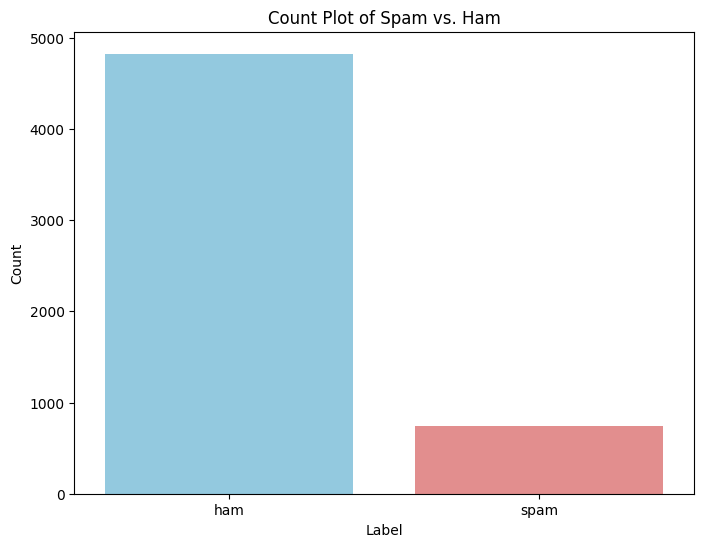

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv ('spam.csv', encoding='latin-1')

# Check the column names
print(df.columns)

# Assuming 'v1' is the column containing labels
label_column = 'v1'

# Plotting a count plot for spam vs. ham
plt.figure(figsize=(8, 6))
sns.countplot(x=label_column, data=df, palette=['skyblue', 'lightcoral'],
              order=df[label_column].value_counts().index)
plt.title('Count Plot of Spam vs. Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


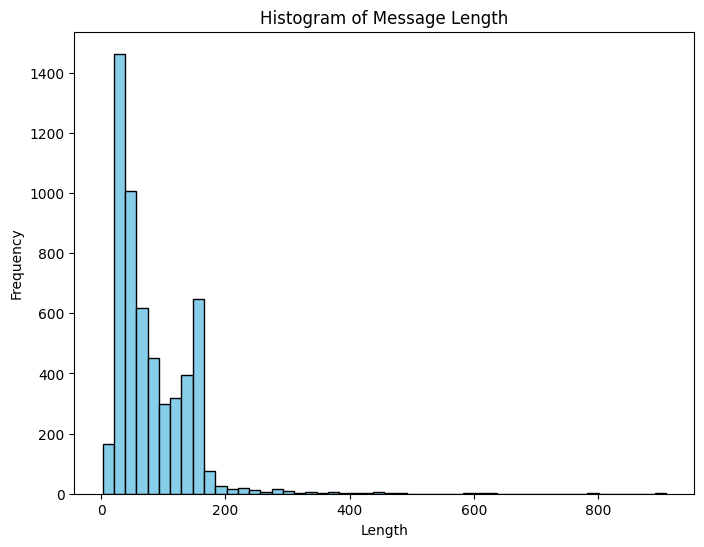

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Calculate the length of each message
df['length'] = df['v2'].apply(len)

# Plotting a histogram for the length of messages
plt.figure(figsize=(8, 6))
plt.hist(df['length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Message Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Split data into features (X) and target (y)
X = df['message']
y = df['label']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Transform text into numerical features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
# Support Vector Machines
svm = SVC(probability=True)
svm.fit(X_train_tfidf, y_train)

SVC(probability=True)

In [ ]:
# Evaluate the classifier on the testing set
# Predict probabilities for each class
y_pred_nb = nb.predict_proba(X_test_tfidf)[:, 1]
y_pred_log_reg = log_reg.predict_proba(X_test_tfidf)[:, 1]
y_pred_svm = svm.predict_proba(X_test_tfidf)[:, 1]

In [ ]:
# Predict labels for each class
y_pred_nb_label = nb.predict(X_test_tfidf)
y_pred_log_reg_label = log_reg.predict(X_test_tfidf)
y_pred_svm_label = svm.predict(X_test_tfidf)

In [ ]:
# Calculate accuracy score for each classifier
acc_nb = accuracy_score(y_test, y_pred_nb_label)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg_label)
acc_svm = accuracy_score(y_test, y_pred_svm_label)

In [ ]:
# Print accuracy score for each classifier
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nb * 100))
print("Accuracy of Logistic Regression: {:.2f}%".format(acc_log_reg * 100))
print("Accuracy of Support Vector Machines: {:.2f}%".format(acc_svm * 100))

Accuracy of Naive Bayes: 96.23%
Accuracy of Logistic Regression: 96.59%
Accuracy of Support Vector Machines: 98.21%


In [ ]:
# Calculate classification report for each classifier
report_nb = classification_report(y_test, y_pred_nb_label)
report_log_reg = classification_report(y_test, y_pred_log_reg_label)
report_svm = classification_report(y_test, y_pred_svm_label)

In [ ]:
# Print classification report for each classifier
print("Classification report of Naive Bayes:")
print(report_nb)
print("Classification report of Logistic Regression:")
print(report_log_reg)
print("Classification report of Support Vector Machines:")
print(report_svm)

Classification report of Naive Bayes:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Classification report of Logistic Regression:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Classification report of Support Vector Machines:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98     

In [ ]:
# Calculate confusion matrix for each classifier
cm_nb = confusion_matrix(y_test, y_pred_nb_label)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg_label)
cm_svm = confusion_matrix(y_test, y_pred_svm_label)

In [ ]:
y_pred = log_reg.predict(X_test_tfidf)

In [ ]:
# Evaluate the performance of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9659192825112107
Confusion matrix:
 [[964   1]
 [ 37 113]]
Classification report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

